Authors: A.Radhakrishnan, GFDL
Ack: Anderson Banihirwe for intake-esm updates, GFDL colleagues for data

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
import numpy as np
%matplotlib inline

esgf-world.json is the ESM collections spec file for the netCDF data in the S3 bucket esgf-world. 
The catalog is updated on an on-demand basis for now. 
You can refer to https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/esm-collection-spec-examples for the most recent catalogs
More examples can be found in https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis/tree/community/examples 


In [2]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
#col_url = "https://raw.githubusercontent.com/aradhakrishnanGFDL/gfdl-aws-analysis/community/esm-collection-spec-examples/esgf-world.json"

In [3]:
col = intake.open_esm_datastore(col_url)

In [4]:
col.df

,project,institute,model,experiment_id,frequency,modeling_realm,mip_table,ensemble_member,grid_label,variable,temporal subset,version,path
0,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,AERmon,r1i1p1f1,gn,ps,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
1,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,CFmon,r1i1p1f1,gn,ta,185001-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
2,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snc,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
3,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snd,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
4,CMIP6,AS-RCEC,TaiESM1,histSST-piNTCF,NaN,NaN,LImon,r1i1p1f1,gn,snw,185002-201412,v20200318,s3://esgf-world/CMIP6/AerChemMIP/AS-RCEC/TaiES...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990606,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rlut,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
990607,CMIP6,UA,MCM-UA-1-0,ssp585,mon,atmos,Amon,r1i1p1f2,gn,rtmt,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
990608,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,sos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...
990609,CMIP6,UA,MCM-UA-1-0,ssp585,mon,ocean,Omon,r1i1p1f2,gn,tos,201501-210012,v20190731,s3://esgf-world/CMIP6/ScenarioMIP/UA/MCM-UA-1-...


In [5]:
#Examples to just search for what we want from the catalog
expname_filter = ['historical']
table_id_filter = 'Amon'
model_filter = 'GFDL-ESM4'
variable_id_filter = "tas"
ens_filter = "r1i1p1f1"
version_filter = "v20190726"
cat = col.search(experiment_id=expname_filter, mip_table=table_id_filter,model=model_filter,variable=variable_id_filter,version="v20190726")

In [6]:
cat

,unique
project,1
institute,1
model,1
experiment_id,1
frequency,1
modeling_realm,1
mip_table,1
ensemble_member,1
grid_label,1
variable,1


In [6]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 1}},storage_options={'anon':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


In [7]:
dset_dict

{'CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon': <xarray.Dataset>
 Dimensions:          (ensemble_member: 1, lat: 180, lon: 288, time: 1980)
 Coordinates:
     height           float64 ...
   * lat              (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
   * lon              (lon) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
   * time             (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
   * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
 Data variables:
     tas              (ensemble_member, time, lat, lon) float32 dask.array<chunksize=(1, 1, 180, 288), meta=np.ndarray>
 Attributes:
     realization_index:       [1]
     parent_time_units:       days since 0001-1-1
     further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
     parent_activity_id:      CMIP
     branch_method:           standard
     experiment:              all-forcing simulation of the recent past
     activity_id:             CMIP
     license:        

In [8]:
hxr_gfdl_esm4 = dset_dict["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Amon"]

In [9]:
hxr_gfdl_esm4.tas

,Array,Chunk
Bytes,410.57 MB,207.36 kB
Shape,"(1, 1980, 180, 288)","(1, 1, 180, 288)"
Count,5942 Tasks,1980 Chunks
Type,float32,numpy.ndarray


! GLOBAL MEAN 
let hgtas = tas[x=@ave,y=@ave,d=1,l=529:780@ave]


In [ ]:
%pip install nc-time-axis #install package

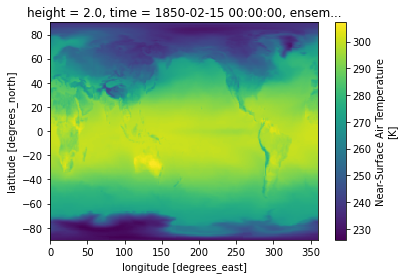

In [14]:
hgtas2d = tas.isel(time=1).plot()

In [20]:
hxr_gfdl_esm4.tas.sel(time=slice("1850","1900"))

,Array,Chunk
Bytes,126.90 MB,207.36 kB
Shape,"(1, 612, 180, 288)","(1, 1, 180, 288)"
Count,6554 Tasks,612 Chunks
Type,float32,numpy.ndarray
